# Анализ убытков приложения ProcrastinatePRO+

Procrastinate Pro+ - развлекательное приложение, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Мы проанализируем предоставленные данные, чтобы выяснить причины и помочь компании выйти в плюс.

Анализ будет проводиться на основе данных с информацией о посещениях сайта, заказах и расходах на рекламу.

### Загрузим данные и подготовим их к анализу

Загрузим данные о визитах, заказах и расходах на рекламу.

Изучим данные и выполним предобработку.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# загружаем датасеты и сохраняем их в переменные
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # посещения
    pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
    pd.read_csv('/datasets/costs_info_short.csv'),  # расходы на рекламу
)

**Описание  и предобработка данных**

Изучим информацию о каждом из датасетов.

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков в таблице нет, проверим дубликаты, переименуем столбцы и приведём формат столбцов с временем (Session Start и Session End) к корректному формату.

Представлены уникальные идентификаторы пользователя, информация о стране, типе устройсва, источнике перехода, дата и время начала и завершения сессии.

In [5]:
# проверяем дубликаты
visits.duplicated().sum()

0

In [6]:
# переименуем столбцы
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [7]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [8]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Пропусков в таблице нет, проверим дубликаты, переименуем столбцы и приведём формат столбцов с временем (Event Dt) к корректному формату.

Представлены уникальный идентификатор пользователя, дата и время совершения покупки и сумма заказа.

In [10]:
# проверяем дубликаты
orders.duplicated().sum()

0

In [11]:
# переименуем столбцы
orders.columns = ['user_id', 'event_dt', 'revenue']

In [12]:
# преобразование данных о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [13]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков в таблице нет, проверим дубликаты, переименуем столбцы и приведём формат столбцов с временем (dt) к корректному формату.

Представлены дата проведения рекламной кампании, идентификатор рекламного источника, расходы на эту кампанию.

In [15]:
# проверяем дубликаты
costs.duplicated().sum()

0

In [16]:
# переименуем столбцы
costs.columns = ['dt', 'channel', 'costs']

In [17]:
# преобразование данных о времени
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [18]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [19]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [20]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

**Профили пользователей**

In [26]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [27]:
# вычисляем минимальную и максимальную даты привлечения пользователей
date_min = profiles['dt'].min()
date_max = profiles['dt'].max()

print('Минимальная дата привлечения пользователей:', date_min)
print('Максимальная дата привлечения пользователей:', date_max)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


In [28]:
# посмотрим, из каких стран пользователи приходят в приложение
profiles.groupby('region').agg({'user_id': 'nunique'})

,user_id
region,
France,17450
Germany,14981
UK,17575
United States,100002


Пользователи приходят из США, Великобритании, Франции и Германии. Больше всего пользователей из США, меньше всего из Германии. На США приходится 66,66% всех пользователей приложения.

In [29]:
# построим таблицу, отражающую количество пользователей и долю платящих из каждой страны
payer_region = profiles.pivot_table(index=['region'], 
                                    columns='payer', 
                                    values={'user_id': 'nunique'}, 
                                    aggfunc='count').reset_index()
payer_region.columns = ['region', 'payer_false', 'payer_true']
payer_region['all'] = payer_region['payer_false'] + payer_region['payer_true']
payer_region['paying'] = round((payer_region['payer_true'] * 100 / payer_region['all']), 2)
payer_region[['region', 'paying']]

,region,paying
0,France,3.80
1,Germany,4.11
2,UK,3.98
3,United States,6.90


Самая большая доля платящих пользователей приходится на США (6,9%), меньше всего доля платящих пользователей во Франции (3,8%).

In [30]:
# посмотрим, какими утройствами пользуются пользователи приложения
profiles.groupby('device').agg({'user_id': 'nunique'})

,user_id
device,
Android,35032
Mac,30042
PC,30455
iPhone,54479


Больше всего пользователей используют iPhone, меньше всего Mac.

In [31]:
# построим таблицу, отражающую количество пользователей и долю платящих среди пользователей разных устройств
payer_device = profiles.pivot_table(index=['device'], 
                                    columns='payer', 
                                    values={'user_id': 'nunique'}, 
                                    aggfunc='count').reset_index()
payer_device.columns = ['device', 'payer_false', 'payer_true']
payer_device['all'] = payer_device['payer_false'] + payer_device['payer_true']
payer_device['paying'] = round((payer_device['payer_true'] * 100 / payer_device['all']), 2)
payer_device[['device', 'paying']]

,device,paying
0,Android,5.85
1,Mac,6.36
2,PC,5.05
3,iPhone,6.21


Больше всего доля платящих пользователей среди пользователей, использующих приложение на Mac (6,36%), меньше всего платящих пользователей с платформы PC (5,05%).

In [32]:
# посмотрим, какие источники привлечения присутствуют в данных
profiles.groupby('channel').agg({'user_id': 'nunique'})

,user_id
channel,
AdNonSense,3880
FaceBoom,29144
LeapBob,8553
MediaTornado,4364
OppleCreativeMedia,8605
RocketSuperAds,4448
TipTop,19561
WahooNetBanner,8553
YRabbit,4312


Больше всего пользователей пришли без использования каналов привлечения, из каналов привлечения лидер - "FaceBoom", меньше всего привлечено пользователей с помощью канала "lambdaMediaAds".

In [33]:
# построим таблицу, отражающую каналы привлечения и долю платящих среди пользователей
payer_channel = profiles.pivot_table(index=['channel'], 
                                    columns='payer', 
                                    values={'user_id': 'nunique'}, 
                                    aggfunc='count').reset_index()
payer_channel.columns = ['channel', 'payer_false', 'payer_true']
payer_channel['all'] = payer_channel['payer_false'] + payer_channel['payer_true']
payer_channel['paying'] = round((payer_channel['payer_true'] * 100 / payer_channel['all']), 2)
payer_channel[['channel', 'paying']]

,channel,paying
0,AdNonSense,11.34
1,FaceBoom,12.20
2,LeapBob,3.06
3,MediaTornado,3.57
4,OppleCreativeMedia,2.71
5,RocketSuperAds,7.91
6,TipTop,9.60
7,WahooNetBanner,5.30
8,YRabbit,3.83
9,lambdaMediaAds,10.47


Топ-3 Лидера по доле платящих пльзователей: "FaceBoom" (12,2%), "AdNonSense" (11,34%), "lambdaMediaAds" (10,47%). Наименьшая доля платящих пользователей принадлежит пользователям, пришедших на органике.

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника..

In [34]:
#посчитаем общую сумму расходов на маркетинг
costs_sum = costs['costs'].sum()
print('Сумма расходов на маркетинг:', costs_sum)

Сумма расходов на маркетинг: 105497.30000000002


In [35]:
# выясним, как траты распределены по рекламным источникам
costs_channel = costs.pivot_table(index=['channel'],
                                    values='costs', 
                                    aggfunc='sum').reset_index()
# добавим столбец с долей от общего количества трат
costs_channel['costs_per'] = round((costs_channel['costs'] * 100 / costs_sum), 2)
costs_channel.sort_values('costs', ascending=False)

,channel,costs,costs_per
6,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
7,WahooNetBanner,5151.00,4.88
0,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
2,LeapBob,1797.60,1.70
9,lambdaMediaAds,1557.60,1.48
3,MediaTornado,954.48,0.90
8,YRabbit,944.22,0.90


Больше всего расходов на рекламные компании 'TipTop', больше половины потраченных средств, при этом привлечённых пользователей меньше, чем кампаниями в 'FaceBoom', а доля платящих пользователей уступает трём каналам привлечения.

Меньше всего потрачено на кампании 'YRabbit' и 'MediaTornado', менее 1% средств. Результаты по этим кампаниям очень близки по значениям, больше на 52 привлечённых пользователей у 'MediaTornado', но доля платящих пользователей больше у 'YRabbit' на 0,26%.

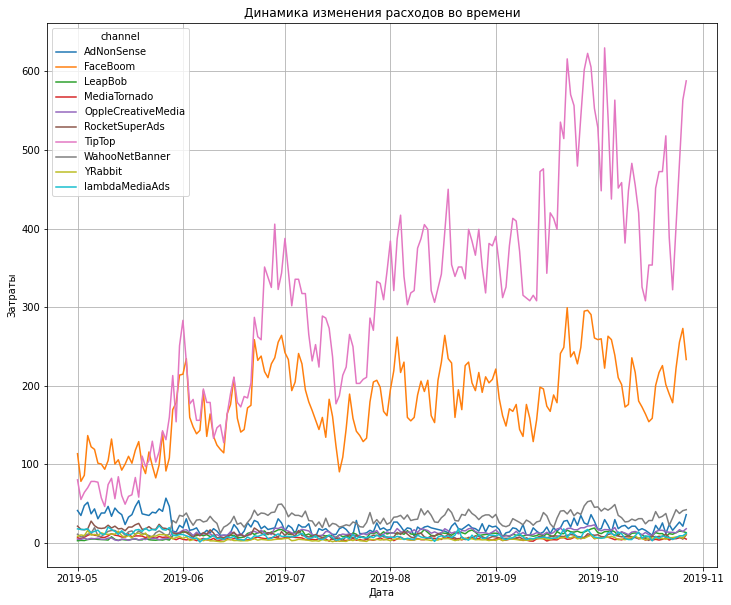

In [36]:
costs_pivot = costs.pivot_table(index='dt', 
                                  columns='channel', 
                                  values='costs', 
                                  aggfunc='sum')
costs_pivot.plot(figsize=(12, 10), grid=True,)

plt.title('Динамика изменения расходов во времени')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

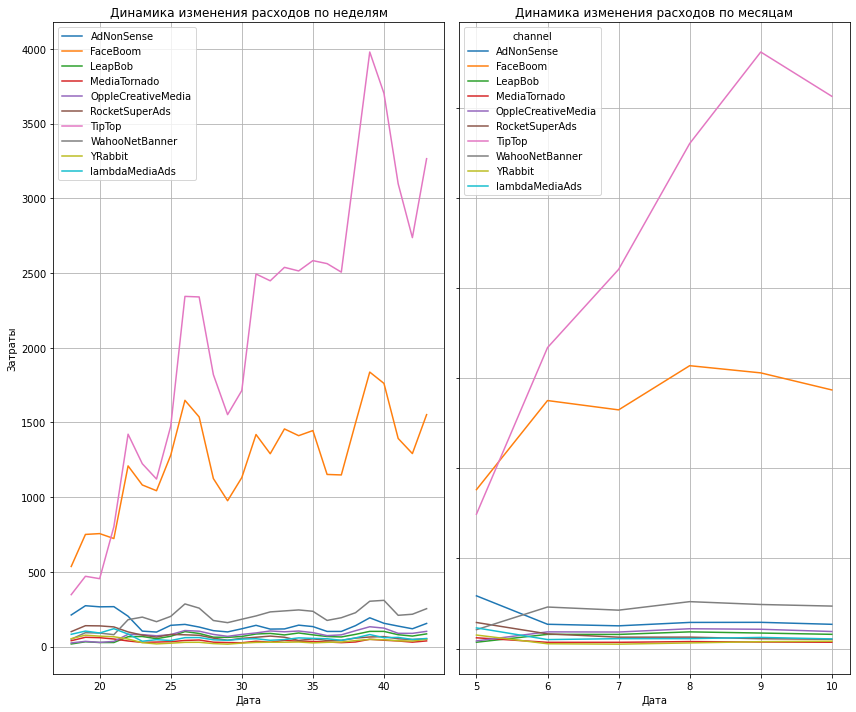

In [37]:
# создаём столбцы в исхододном датафрейме с нделями и с месяцами
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

#создаём графики
costs_pivot_week = costs.pivot_table(index='week', 
                                  columns='channel', 
                                  values='costs', 
                                  aggfunc='sum')
costs_pivot_month = costs.pivot_table(index='month', 
                                  columns='channel', 
                                  values='costs', 
                                  aggfunc='sum')

ax1 = plt.subplot(1, 2, 1)
costs_pivot_week.plot(figsize=(12, 10), grid=True, ax=ax1)
plt.legend()
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Дата')
plt.ylabel('Затраты')
    
ax2 = plt.subplot(1, 2, 2)
costs_pivot_month.plot(grid=True, ax=ax2, sharey=ax1)
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Дата')
plt.ylabel('Затраты')

plt.tight_layout()
plt.show()

На графике наглядно представлен контраст между затратами на каналы привлечения 'TipTop' и 'FaceBoom' и другими каналами, а также заметен рост расходов для этих двух платформ. Также можно увидеть небольшое увеличение затрат для 'WahooNetBanner' и снижение расходов на 'AdNonSense', не смотря на то, что доля платящих пользователей привлечённых с этой платформы уступает только 'FaceBoom' и составляет 11,34%. 

In [38]:
# выясним, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
acquisition_cost_channel = profiles.pivot_table(index='channel',
                                               values='acquisition_cost',
                                               aggfunc='mean').reset_index()
acquisition_cost_channel.sort_values('acquisition_cost')


,channel,acquisition_cost
10,organic,0.000000
2,LeapBob,0.210172
3,MediaTornado,0.218717
8,YRabbit,0.218975
4,OppleCreativeMedia,0.250000
5,RocketSuperAds,0.412095
7,WahooNetBanner,0.602245
9,lambdaMediaAds,0.724802
0,AdNonSense,1.008054
1,FaceBoom,1.113286


Дороже всего в среднем обошлись пользователи, которые были привлечены благодаря каналу 'TipTop' - 2.79, на втором месте (дешевле в два раза) обошлись пользователи 'FaceBoom' - 1.11, на третьем месте 'AdNonSense'- 1.0.

Самые "дешёвые пользователи", не считая органических, привлечены через каналы 'LeapBob', 'MediaTornado', 'YRabbit'. Через эти каналы в среднем каждый пользователь обошёлся компании в 0,21.

### Окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

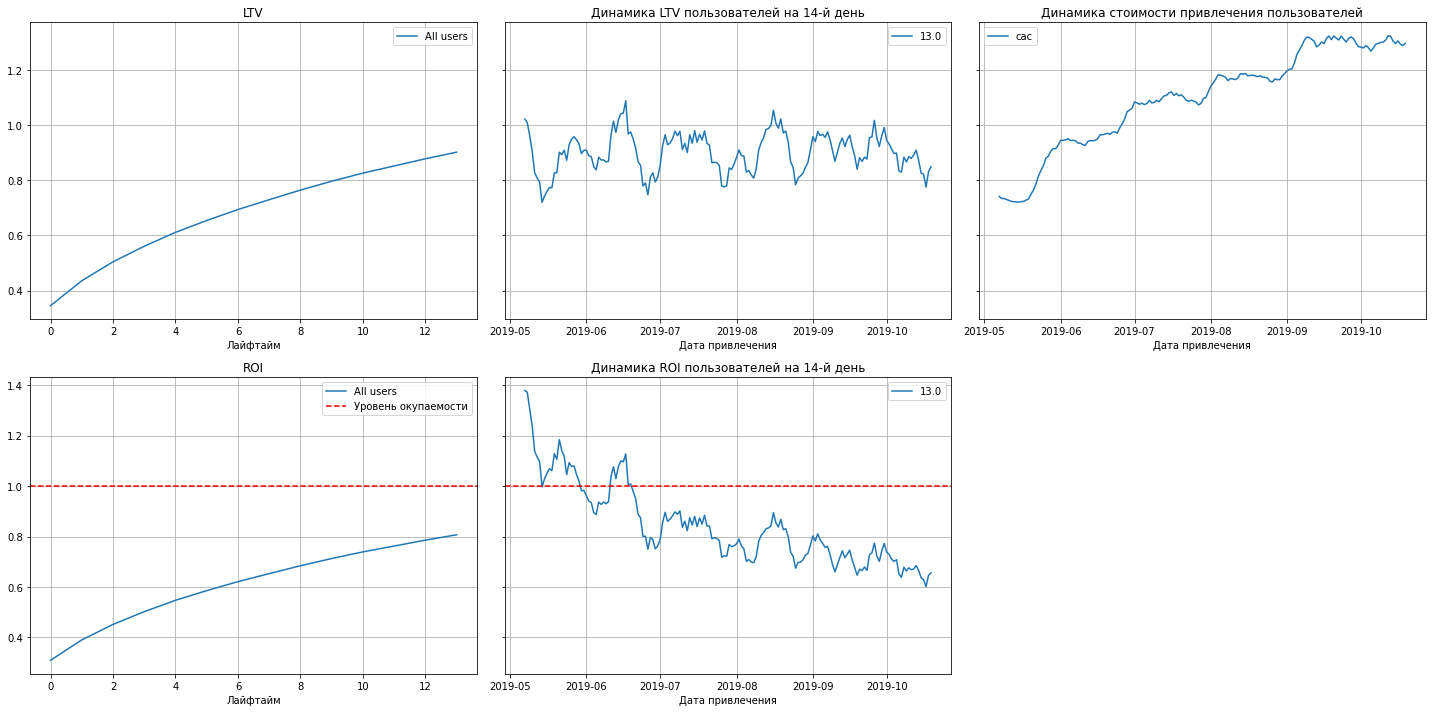

In [39]:
# проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

#исключим из анализа органических пользователей
profiles_channel = profiles[profiles.channel != 'organic']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Реклама не окупается, в конце второй недели находится на уровне 80%. ROI, начиная со второй половины июля всегда ниже уровня окупаемости при этом в мае значения  превосходят уровень окупаемости
- САС резко увеличивается с июня и продолжает расти
- LTV стабилен

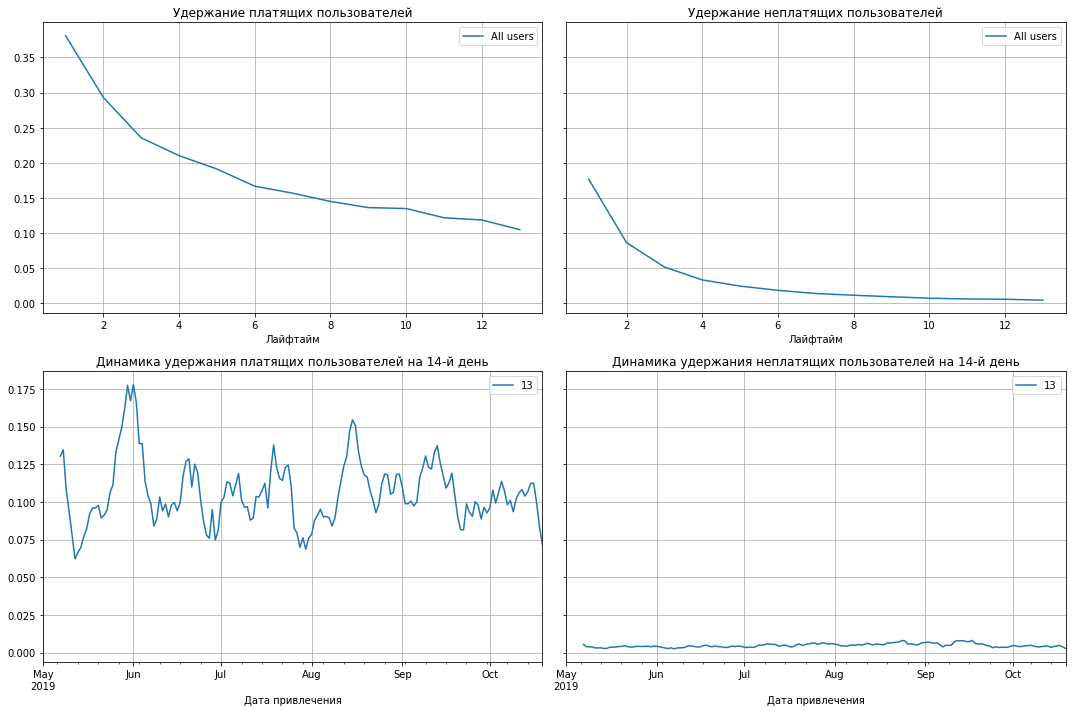

In [40]:
# построим и изучим графики удержания
retention_raw, retention_grouped, retention_history = get_retention(profiles_channel, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей платящих пользователей выше, чем не платящих, на 14 день удержание около 10%. В первые дни не выше 40%.

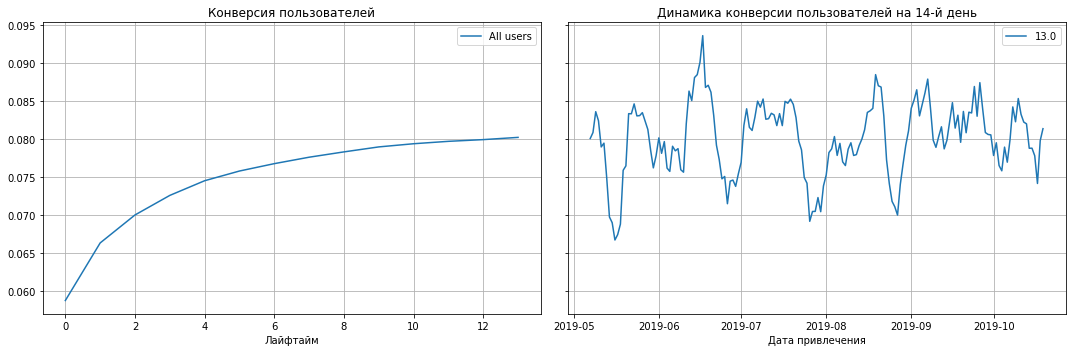

In [41]:
# построим и изучим графики конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_channel, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

К 14 дню конверсия достигает 8%. За всё время самая низкая конверсия - в середине мая (около 6,5%), самая высокая конверсия в середине июня (около 9,5%).

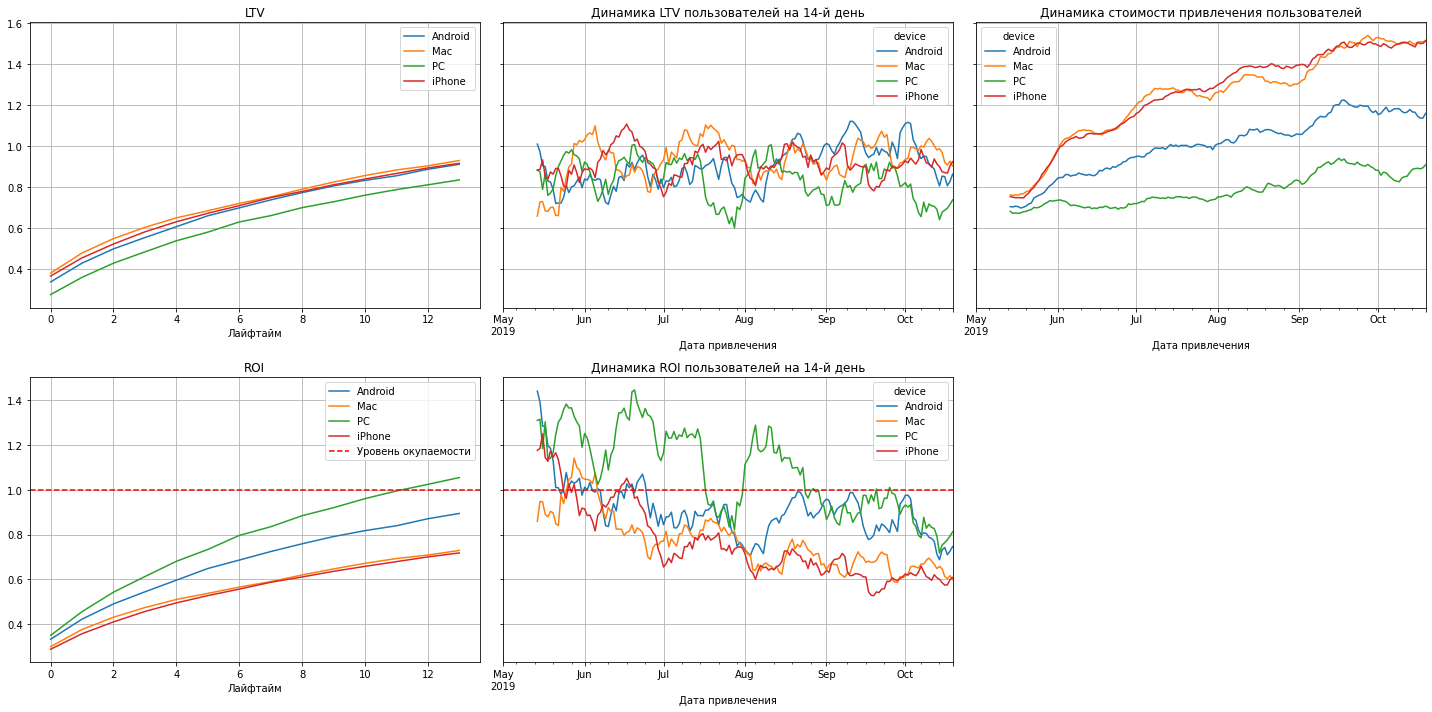

In [42]:
# проверим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV для всех устройств стабилен, больше всего прибыли компания получает от пользователей Mac, далее идут пользователи, использующие iPhone,  затем Android, меньше всего прибыли от пользоdателей на PC, но при этом именно пользователи на PC окупаются, в отличии от пользователей других устройств. Меньше всего окупаются пользователи Mac, затем iPhone, около 90% окупаемости у пользователей Android к концу второй недели. По динамике ROI можно заметить, что с конца августа ни одна из платформ не окупается.

Динамика стоимости привлечения показывает, что больше всего стоимость на привлечение пользователей  Mac и iPhone,  далее идут пользователи Android и меньше всего стоимость пользователей на PC.

В совокупности получается что пользователи Mac и iPhone приносят больше прибыли, но они дороже стоят и не окупаются, пользователи на Android приносят немного меньше прибыли (в сеедине августа, сентябре и октябре есть несколько пиков, где они приносят больше дохода, чем остальные), затраты на этих пользователей меньше, чем на Mac и iPhone, они также не окупаются, но окупаемость в районе 90%. Пользователли на PC приносят меньше всего прибыли, стоимость привлечения меньше всего и они единственные окупаются, но на динамике видно, что пользователи на PC перестали окупатся в конце августа.

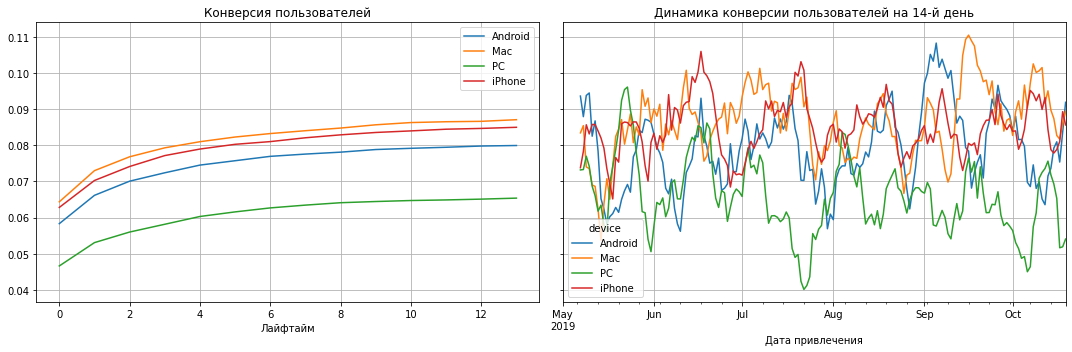

In [43]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Выше всего конверсия у пользователей на устройствах Mac и iPhone, к концу второй недели выше 8%. Меньше всего конверсия у PC - чуть меньше 7%. Конверсия пользователей Android достигает 8%.

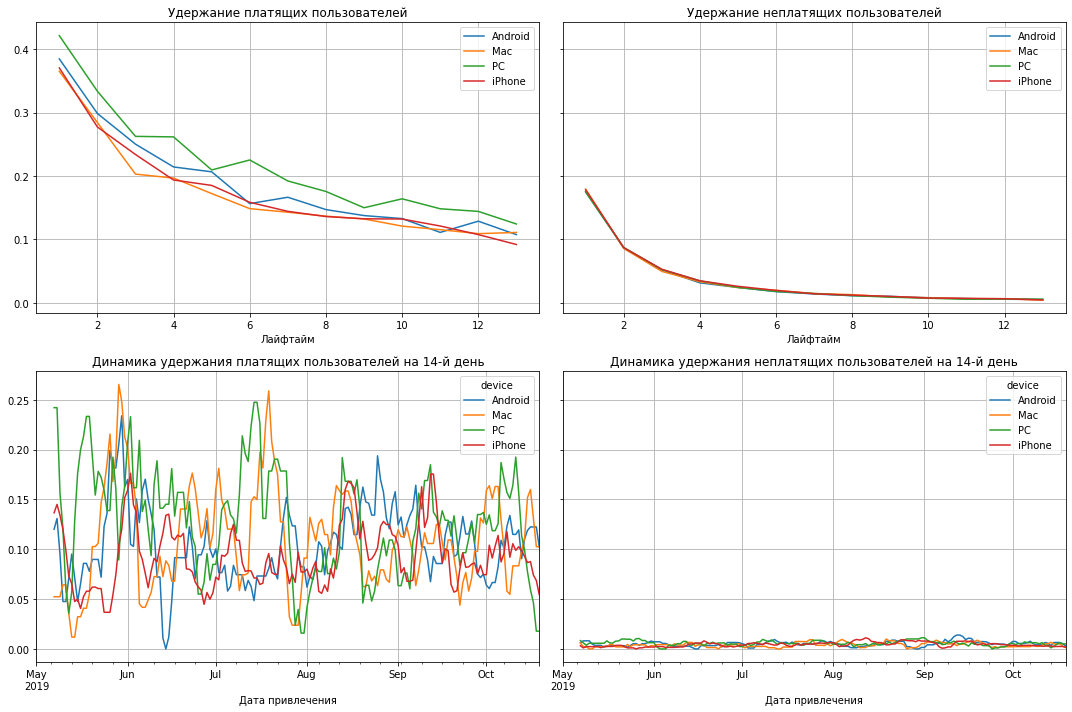

In [44]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_channel, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей выше у пользователей PC (около 12%), к концу второй недели ниже всего у пользователей iPhone (менее 10%).

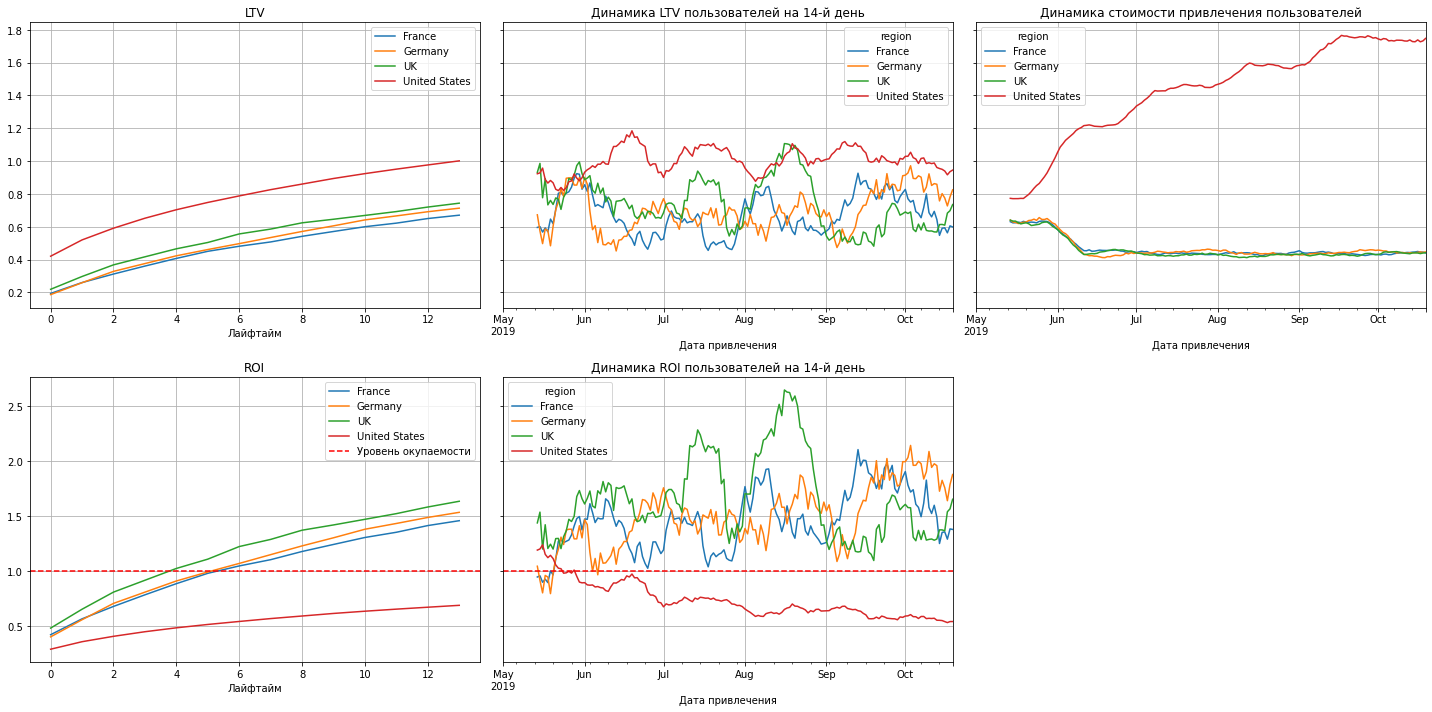

In [45]:
# проверим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Все страны стабильно окупаются, кроме США, при этом стоимость привлечения пользователей в несколько раз выше. При этом LTV пользователей из США выше, чем у других стран.

Пользователи из Великобритании окупаются раньше всех, в среднем на 4 день. Пользователи Германии и Франции окупаются на 5 день.

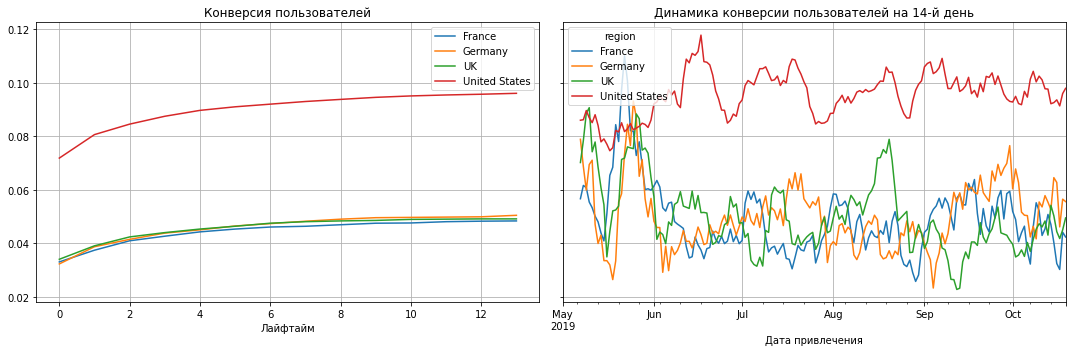

In [46]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователй из США стремится к 10% и превышает другие страны почти в 2 раза.

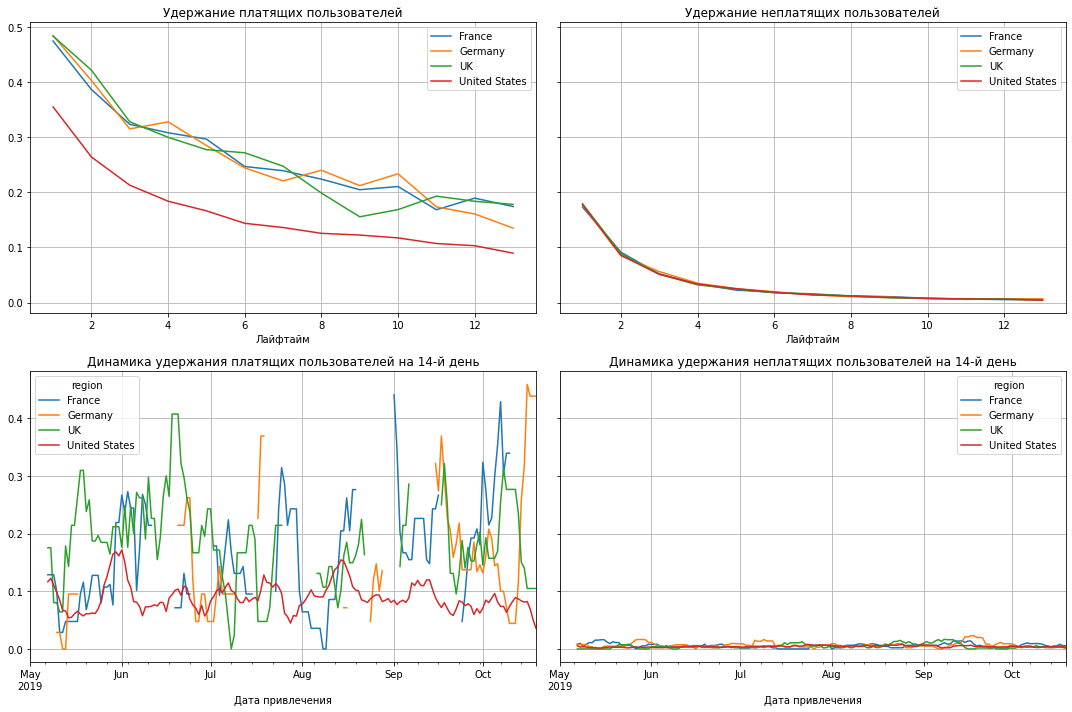

In [47]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_channel, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

При этом удержание пользователей из Америки ниже, чем в других странах.

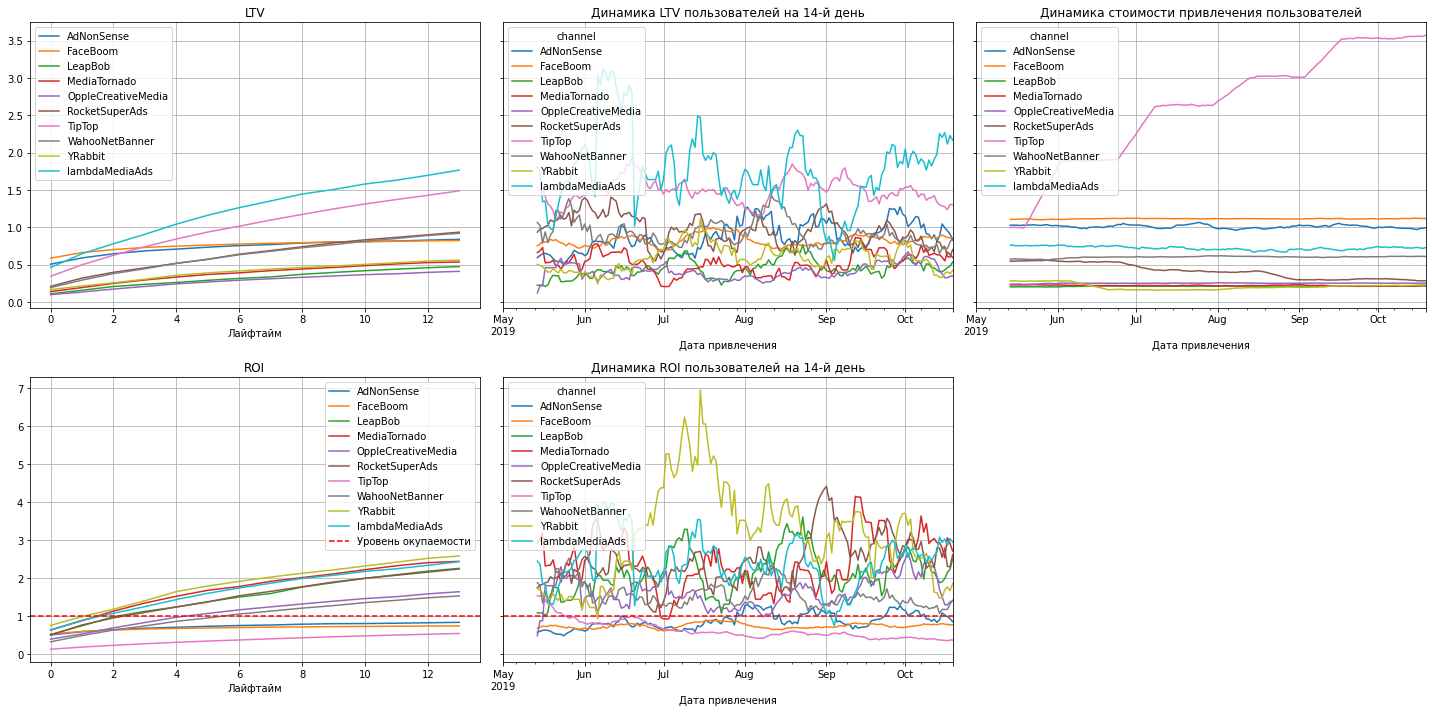

In [48]:
# проверим окупаемость с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Стабильно не окупаются пользователи из трёх каналов привлечения: 'TipTop', 'FaceBoom', 'AdNoneSense'

При этом высокая окупаемость у 'YRabbit', 'MediaTornado', 'lambdaMediaAds'

Ярко выражены высокие LTV у 'lambdaMediaAds' и 'TipTop', при этом стоимость привлечения через 'TipTop' выше остальных каналов в несколько раз.

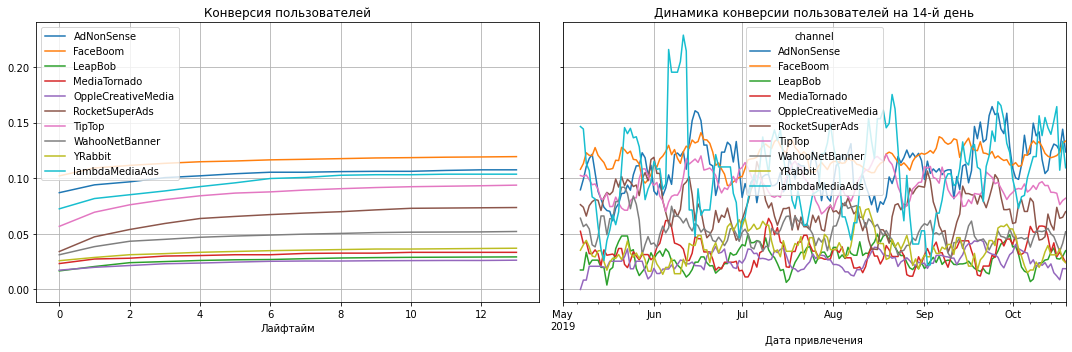

In [49]:
# смотрим конверсию с разбивкой по рекламным каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Выше всего конверсия пользователей, привлечйнных через каналы 'FaceBoom', 'AdNoneSense', 'lambdaMediaAds'

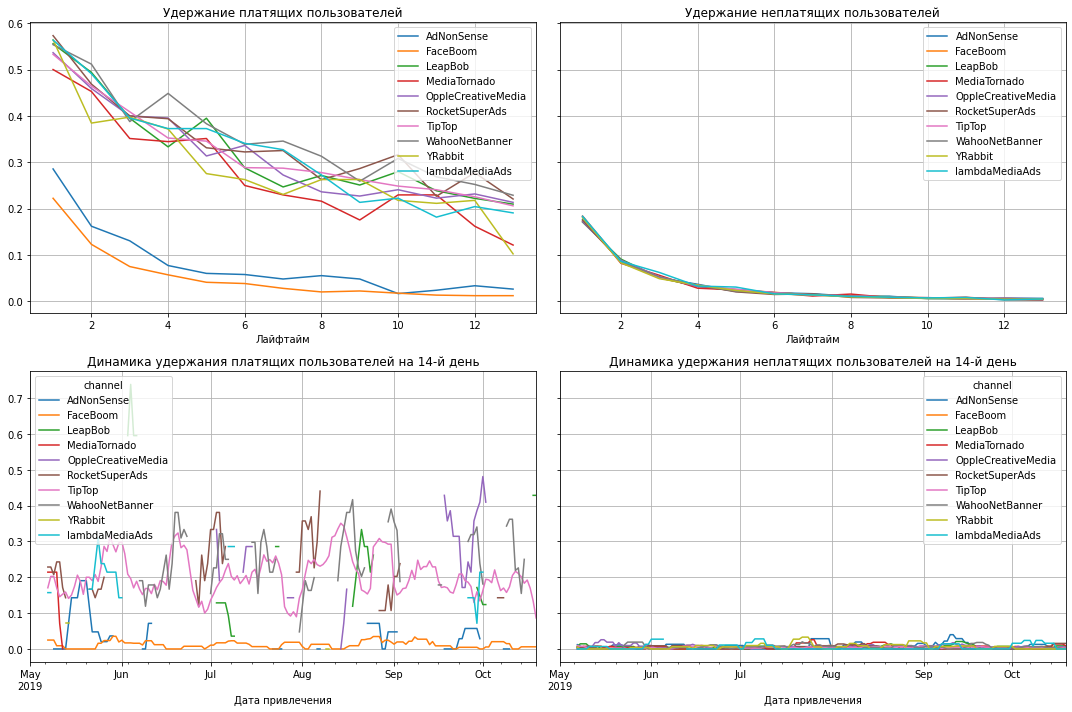

In [50]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_channel, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей ниже всего через канал 'FaceBoom' и 'AdNoneSense', также на 14 день падает удержание у пользователей 'YRabbit' и 'MediaTornado'.

In [51]:
# для более точной картины посмотрим через какие каналы привлекаются пользователи в разных странах
region_channel = profiles.pivot_table(index=['region', 'channel'],
                                      values={'user_id': 'nunique'},
                                      aggfunc='count').reset_index()
region_channel

,region,channel,user_id
0,France,AdNonSense,1366
1,France,LeapBob,2988
2,France,OppleCreativeMedia,2991
3,France,WahooNetBanner,2971
4,France,lambdaMediaAds,742
5,France,organic,6392
6,Germany,AdNonSense,1219
7,Germany,LeapBob,2519
8,Germany,OppleCreativeMedia,2562
9,Germany,WahooNetBanner,2579


Каналы привлечения для европейских стран (Франция, Германия и Великобритания) - одинаковы:
- AdNonSense
- LeapBob
- OppleCreativeMedia
- WahooNetBanner
- lambdaMediaAds

Для пользователей из США используются другие каналы пользователей:

- FaceBoom
- MediaTornado
- RocketSuperAds
- TipTop
- YRabbit

Так как не окупается привлечение пользователей из США, именно на них стоит обратить внимание в первую очередь

In [52]:
# проверим какие устройства в каких странах больше катируются
device_channel = profiles.pivot_table(index=['region', 'device'],
                                      values={'user_id': 'nunique'},
                                      aggfunc='count').reset_index()
device_channel

,region,device,user_id
0,France,Android,5252
1,France,Mac,1838
2,France,PC,6940
3,France,iPhone,3420
4,Germany,Android,4440
5,Germany,Mac,1584
6,Germany,PC,5945
7,Germany,iPhone,3012
8,UK,Android,5141
9,UK,Mac,1778


Чаще всего Mac и iPhone используются в США, так как США ROI ниже уровня окупаемости, возможно именно это влияет на уровень окупаемости этих платформ

/tmp/ipykernel_225/1132052336.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  profiles_channel_us = profiles_channel[profiles.region == 'United States']


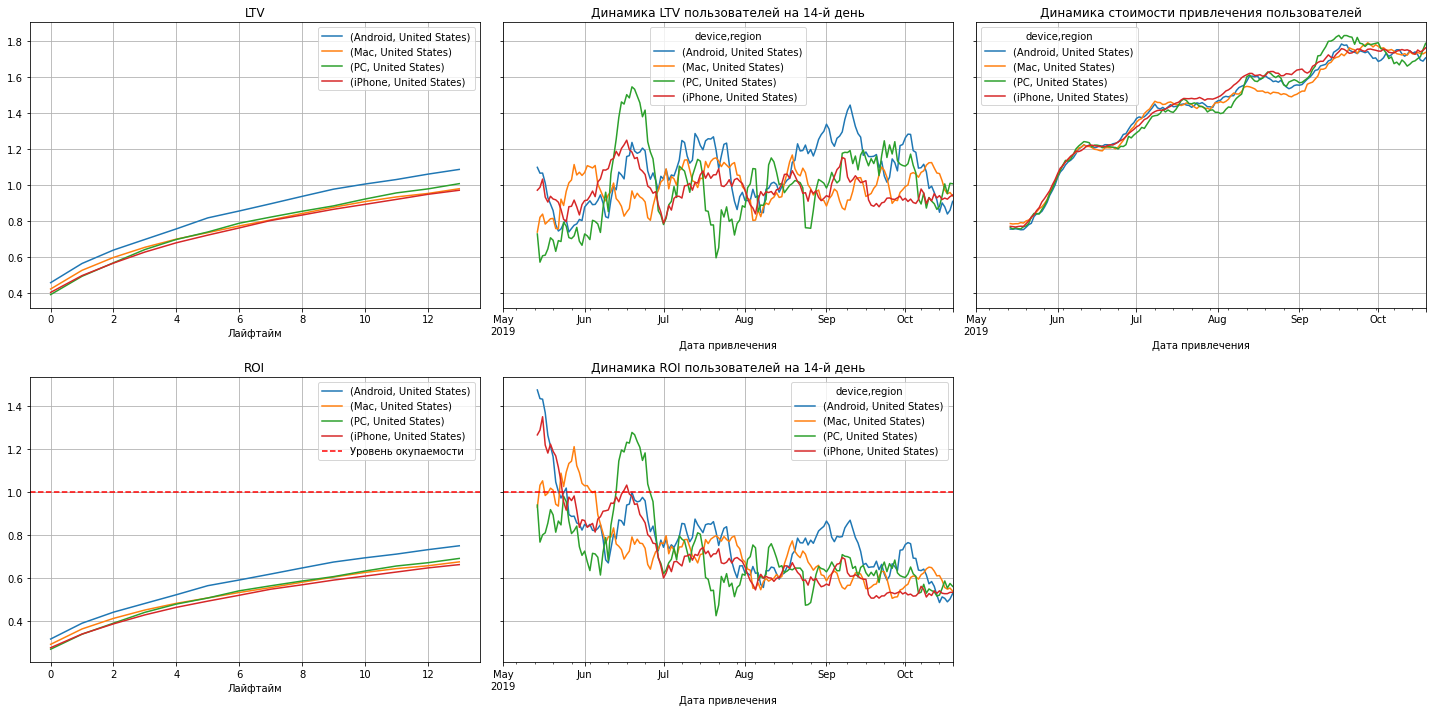

In [53]:
profiles_channel_us = profiles_channel[profiles.region == 'United States']

dimensions = ['device', 'region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel_us, orders, observation_date, horizon_days, dimensions=dimensions
) 
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

/tmp/ipykernel_225/1945085468.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  profiles_channel_uk = profiles_channel[profiles.region == 'UK']


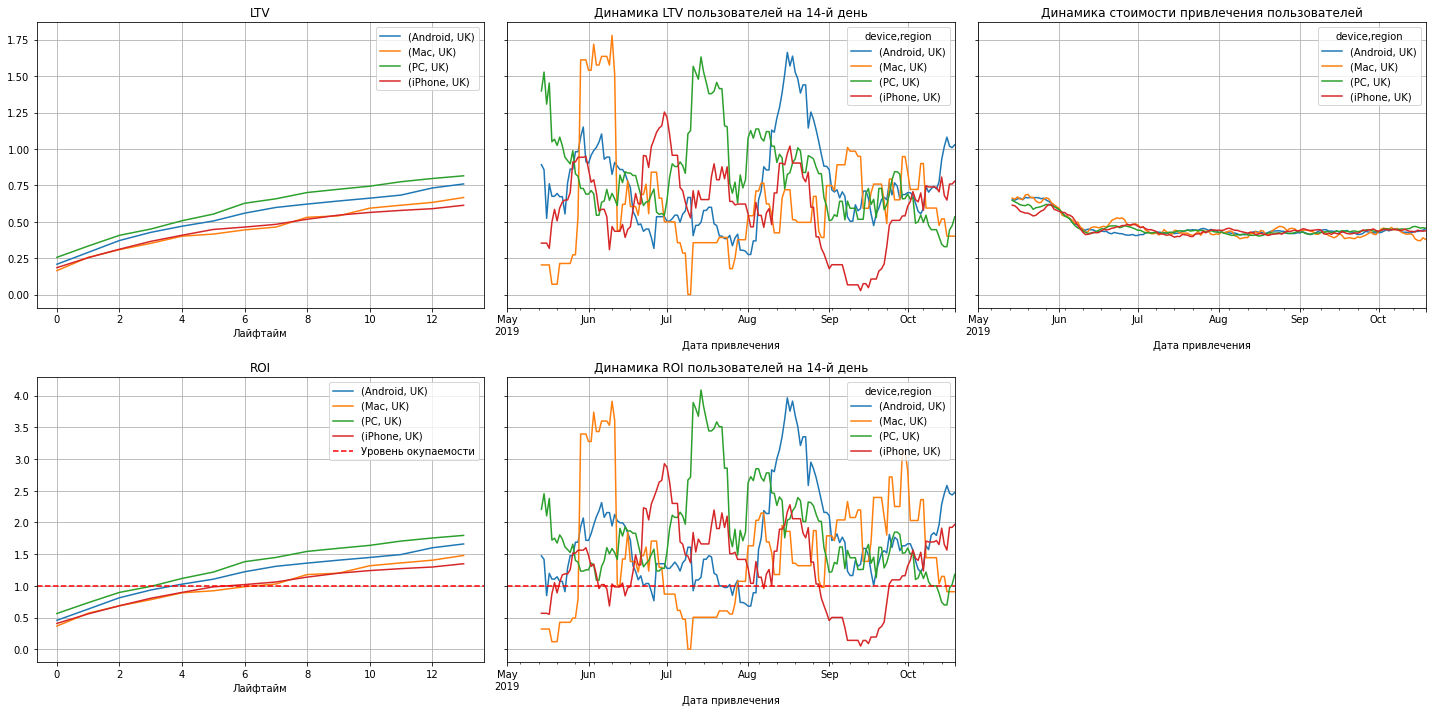

In [54]:
profiles_channel_uk = profiles_channel[profiles.region == 'UK']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel_uk, orders, observation_date, horizon_days, dimensions=dimensions
) 
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

/tmp/ipykernel_225/4040711924.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  profiles_channel_g = profiles_channel[profiles.region == 'Germany']


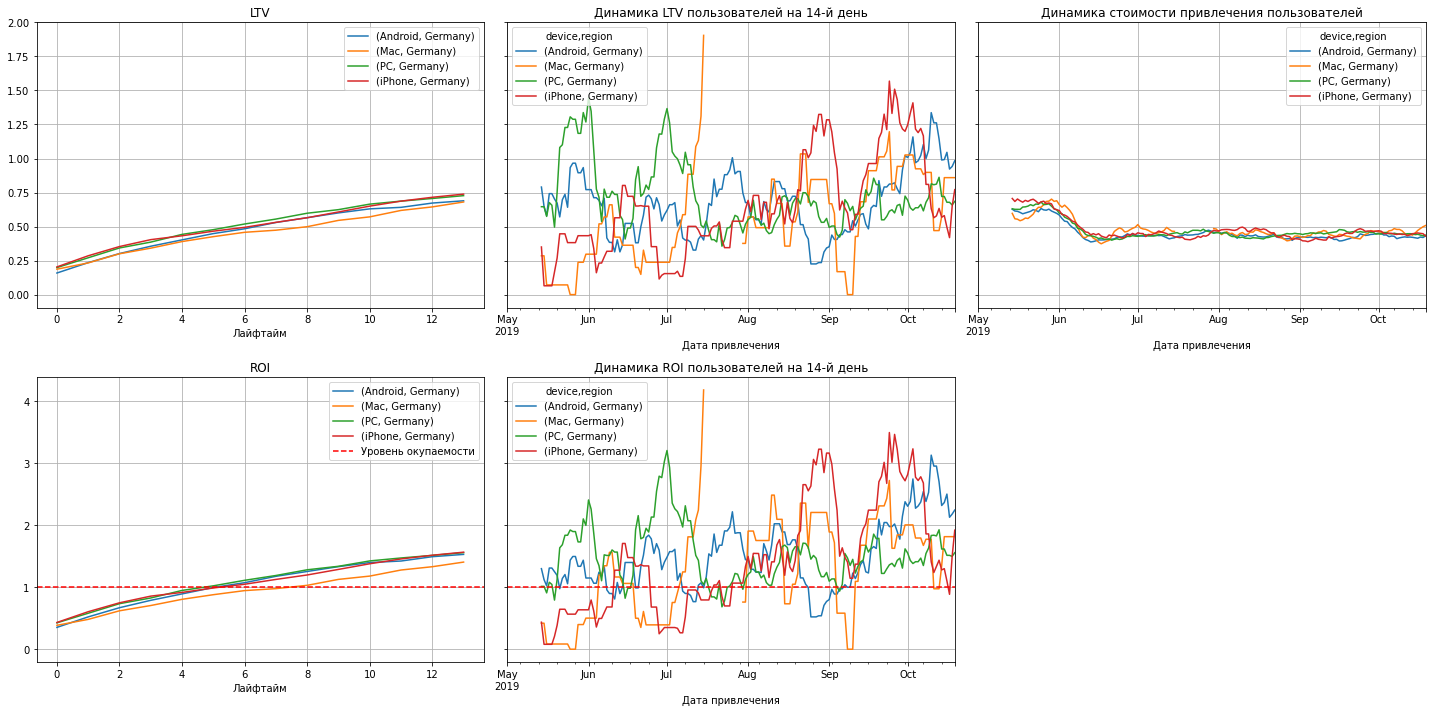

In [55]:
profiles_channel_g = profiles_channel[profiles.region == 'Germany']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel_g, orders, observation_date, horizon_days, dimensions=dimensions
) 
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

/tmp/ipykernel_225/2423660396.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  profiles_channel_f = profiles_channel[profiles.region == 'France']


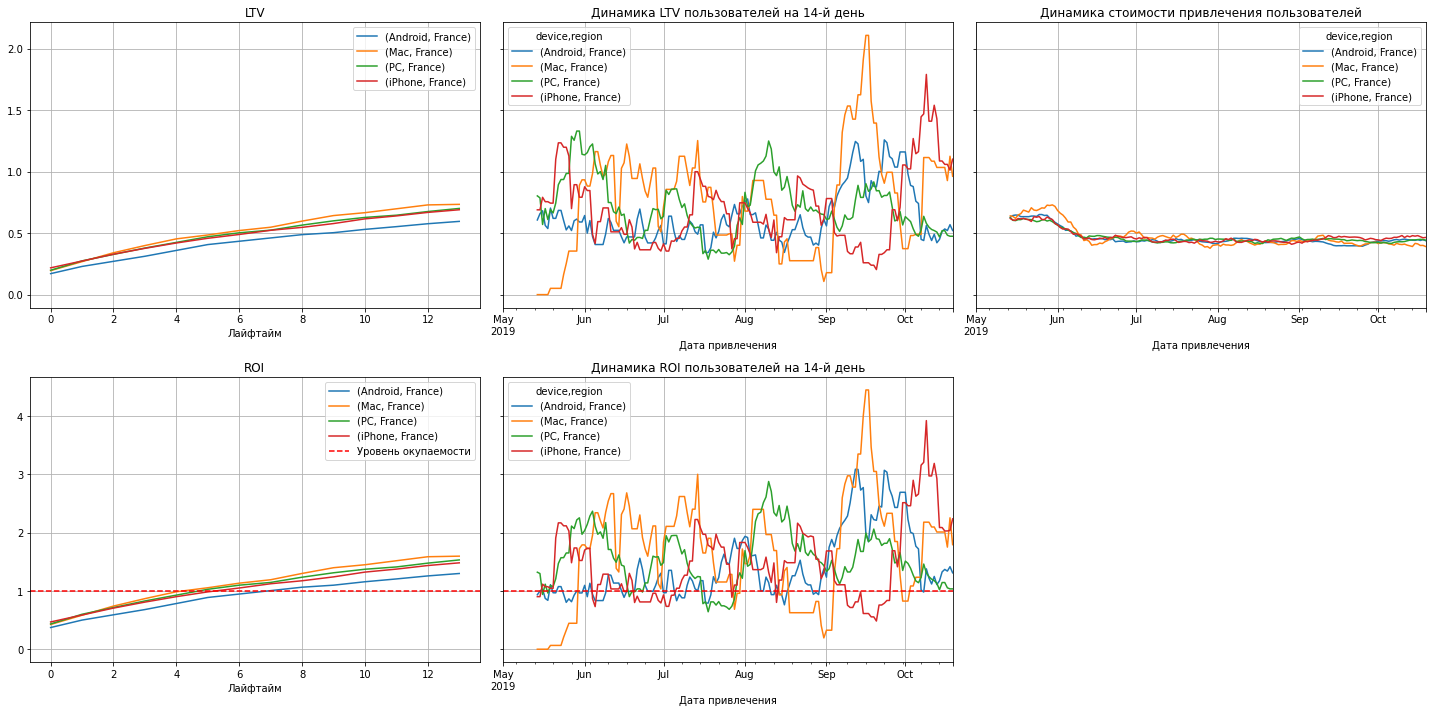

In [56]:
profiles_channel_f = profiles_channel[profiles.region == 'France']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channel_f, orders, observation_date, horizon_days, dimensions=dimensions
) 
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Все устройства исправно окупаются, во всех странах, кроме США, и в США не окупаются также все устройства, из этого следует, что проблема не в устройствах, а так как для европейских стран и США используются разные каналы привлечения, то следует вывод, что не окупается этот регион скорее всего из-за дорогостоящих канлов привлечения.

### Выводы

Был проведён анализ данных развлекательного приложения Procrastinate Pro+ с целью выяснения причин убытков компании в последние несколько месяцев. А также для помощи компании выйти в плюс.

Общие выводы анализа:
 
- Реклама не окупается, в конце второй недели находится на уровне 80%.

- ROI, начиная со второй половины июля ниже уровня окупаемости при этом в мае значения дочтаточно высокие и превосходят уровень окупаемости.

- САС резко увеличиваетсяс июня и продолжает расти.

- LTV стабилен.

- Конверсия к 14 дню достигает 8%. За всё время в исследуемом периоде самая низкая конверсия - в середине мая (около 6,5%), самая высокая конверсия в середине июня (около 9,5%).

- Удержание платящих пользователей имеет такие значения: на первые дни не более 40%, на 14 день удержание платящих не превышает 10%.

Приложением пользуются пользователи из четырёх стран: США, Великобритании, Франции и Германии. Больше всего пользователей из США (66,66% от общего количества пользователей).

Рекалмные кампании проводятся через 10 каналов привлечения, 5 каналов для европейских стран *(AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner, lambdaMediaAds)* и 5 каналов для США *(FaceBoom, MediaTornado, RocketSuperAds, TipTop, YRabbit)*.

Основные проблемы - это окупаемость и удержание пользователей.

**Окупаемость**

Проблема окупаемости связана с тем, что рекламные кампании не окупаются в стране с наибольшим количеством пользователей - США, что может быть связано с большой стоимостью привлечения. Так как LTV, конверсия и доля платящих пользователей у США выше, чем у других стран, изменение политики рекламных кампаний - в приоритете. Также заметно, что не окупаются и дороже всего обходятся пользователи, которые пользуются iPhone и Mac. но это скорее следствие того, что именно в США больше всего пользователей данных платформ.

Стабильно не окупаются пользователи из трёх каналов привлечения: 'TipTop' (США), 'FaceBoom' (США), 'AdNoneSense' (Европа). Пользователи привлечённые через эти каналы обошлись компании дороже всего: 'TipTop' - 2.79, 'FaceBoom' - 1.11, 'AdNonSense'- 1.0. 

Больше половины от общего количества потраченных средств приходится на рекламные кампании'TipTop', при этом привлечённых пользователей меньше, чем кампаниями в 'FaceBoom', а доля платящих пользователей уступает трём каналам привлечения, от 'TipTop' для привлечения пользователей на американском рынке стоит отказаться. С 'FaceBoom' всё не так однозначно, самая большая доля платящих пользователей, высокая конверсия пользователей, но при этом большие при этом удержание платящих пользователей ниже, чем в других каналах привлечения, думаю есть смысл за счёт сокращения расходов 'TipTop' использовать другие каналы привлечения, которые на данном этапе имеют большую окупаемость: 'YRabbit', 'MediaTornado'.

На европейском рынке 'AdNoneSense' можно заменить на 'lambdaMediaAds', так как это один из лидеров по конверсии, входит в Топ-3 по доле платящих пользователей, и ярко выражены высокие LTV привлечённых пользователей через этот канал, имеет одну из самых высоких окупаемостей.

**Удержание**

Удержание пользователей в большей степени связано скорее с самим приложением, чем с рекламными кампаниями, а значит это может зависить от платформ, с которых пользователи пользуются приложением. Удержание платящих пользователей выше всего у пользователей PC, ниже у пользователей Mac, но при этом разница не ярко выражена, проблема может быть в самом приложении, которое может плохо удерживать пользователей и также есть смысл обратить внимание на канал привлечения 'FaceBoom' и 'AdNoneSense', у них значительно ниже удержание платящих пользователей, относитеьно других каналов.
